# Project Summaries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8.0,6.0)})

In [16]:
data = pd.read_csv('../data/training/train.csv',index_col=1, parse_dates=True)

In [17]:
raw_data_dir = '../data/raw/'
meta_data_dir = '../data/meta/'

In [18]:
claims_filename = 'dim_claims.csv'
claims = pd.read_csv(f'{raw_data_dir}{claims_filename}')

In [19]:
pa_filename = 'dim_pa.csv' 
pa = pd.read_csv(f'{raw_data_dir}{pa_filename}',index_col=1, parse_dates=True)

In [20]:
date_filename = 'dim_date.csv'
dates = pd.read_csv(f'{raw_data_dir}{date_filename}', index_col=1, parse_dates=True)

# Suggestions from CoverMyMeds Team:

## Discover Formulary Status for Certain Payers

Application: Valuable date for the market.

This is a discovery project, we can use all the data available to try to assess this, however the most relevant columns are: 
* drug A B or C 
* reject code 
* pharmacy claim approved 
* correct diagnosis
* tried and failed
* contraindication
* bin: identification number for payer

Which we can use to piece together a payer's formulary.

In [21]:
data.head()

,Unnamed: 0,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_date_id
date_val,,,,,,,,,,,,,,,,,,,
2018-01-10,395940,2018,1,10,4,1,1,0,395941,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07,893697,2019,2,7,5,1,1,0,893698,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16,1158683,2019,8,16,6,1,1,0,1158684,417740,B,70.0,0,481888.0,0.0,1.0,1.0,0.0,958.0
2018-12-11,815508,2018,12,11,3,1,1,0,815509,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,519998,2018,4,14,7,0,0,0,519999,417380,B,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


## Predict whether a PA will be needed at the point of prescribing

Application:  to prevent a patient from going to the pharmacy,
only to return home empty handed

* Y data: pharmacy_claim_approved: 0 or 1, if 0, then claim not approved, and a PA is needed  
* X data: X_cols - claims columns - reject code and dates columns (no PA information)

Note: might want to drop dim_claim_id and since we don't expect these numbers to indicate any information about whether a claim will be approved.

In [22]:
claims.columns

Index(['dim_claim_id', 'bin', 'drug', 'reject_code',
       'pharmacy_claim_approved'],
      dtype='object')

In [23]:
dates.columns

Index(['dim_date_id', 'calendar_year', 'calendar_month', 'calendar_day',
       'day_of_week', 'is_weekday', 'is_workday', 'is_holiday'],
      dtype='object')

In [24]:
data[['pharmacy_claim_approved','reject_code']].head()

,pharmacy_claim_approved,reject_code
date_val,,
2018-01-10,1,NaN
2019-02-07,1,NaN
2019-08-16,0,70.0
2018-12-11,1,NaN
2018-04-14,1,NaN


## Predict whether a PA will be successful based upon claims data, or data included on the ePA

Application:  to prevent patients from waiting
on a decision, only to end up having to switch to another therapy if the PA is rejected.

1 should be pa_approved and 0 non approved

X data: claims.csv data and 
Y data: 

In [25]:
pa.head()

,dim_pa_id,tried_and_failed,contraindication,pa_approved
correct_diagnosis,,,,
1,1,1,0,1
1,2,0,0,1
0,3,0,1,1
1,4,1,0,1
0,5,1,0,1


## We can also forecast future monthly PA volume as a function of historical volume 

Application: to generate more accurate budgets.

In [27]:
pa_data = data.dropna()
pa_data_daily_count = data.resample('D').count()
pa_data_daily_sum = data.resample('D').sum()

In [29]:
pa_data_daily_count_weekday = pa_data_daily_count[pa_data_daily_sum['is_workday'].values!=0]
pa_data_daily_count_weekend = pa_data_daily_count[pa_data_daily_sum['is_workday'].values==0]

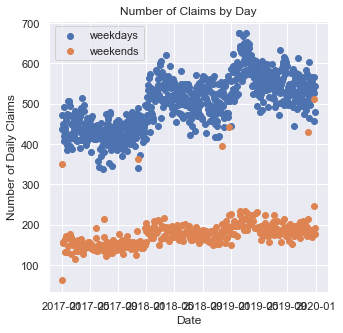

In [30]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(5, 5))

# Add x-axis and y-axis
ax.scatter(pa_data_daily_count_weekday.index.values,
           pa_data_daily_count_weekday['calendar_month'],label='weekdays')

ax.scatter(pa_data_daily_count_weekend.index.values,
           pa_data_daily_count_weekend['calendar_month'],label='weekends')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Daily Claims",
       title="Number of Claims by Day")

ax.legend()

plt.show()

# Choose Your Own Adventure: 

In [31]:
data.head()

,Unnamed: 0,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_date_id
date_val,,,,,,,,,,,,,,,,,,,
2018-01-10,395940,2018,1,10,4,1,1,0,395941,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-07,893697,2019,2,7,5,1,1,0,893698,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16,1158683,2019,8,16,6,1,1,0,1158684,417740,B,70.0,0,481888.0,0.0,1.0,1.0,0.0,958.0
2018-12-11,815508,2018,12,11,3,1,1,0,815509,999001,A,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-14,519998,2018,4,14,7,0,0,0,519999,417380,B,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
